# K-Means Clustering ICE5

**Goals:**
>1. Implement K-Means algorithm to create clusters
>2. Create a silhouette plot to evaluate the number of clusters

**Review:**
> We did regression and classification for supervised learning models to predict labels based on labeled training data.

When one is without preconceived categories or even knowing what one is looking for, unsupervised learning is the ideal approach. It allows the algorithm to detect the patterns that may be too complex for human to recognize.

The algorithm reads the unlabeled data and discovers hidden patterns within.

**Example - Anomaly Detection:**

For instance, the construction of a commercial airliner involves millions of mechanical parts. Each part of the aircraft will have a degree of error in length, weight, or performance due to simple variation in quality control — all pieces meeting a minimum standard, but not perfect. Even though all parts individually may work without perceivable error, in a complex machine like an aircraft, the accumulated error may be catastrophic. Traditionally, technicians must manually conduct multiple systemic evaluations of the plane, which cost tremendous amounts of time and money. Using an unsupervised approach, such as Anomaly Detection, and data regarding the quality of each part, an algorithm can holistically assess the amount of accumulated error and determine to what extent the accumulated errors affect the quality of the plane’s airworthiness, before the plane even leaves the warehouse.

**Advantanges:**
>1. Cost-efficient: Don't have to label every part.
>2. Gain data stucture and find hidden relationships.
>3. Identify interesting cases in complex data structure.

**Clustering and k-Means:**

>1. sklearn has many clustering algorithms
>2. k-means clustering, implemented in sklearn.cluster.KMeans
>3. k-means searches for a pre-determined number of clusters within an unlabled multidimensional dataset.
>4. **Cluster Center** = arithmetic mean of all the points belonging to the cluster.
>5. Each point is closer to its own cluster center than to other cluster centers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Then simulate data on a two-dimensional plane with <mark>make_blobs</mark>. This function will return 
>1. a set of data
>2. the true labels for each observatrion

In [2]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


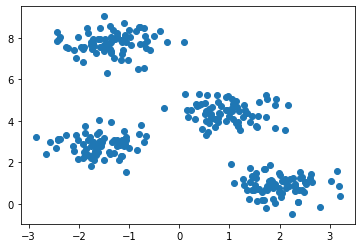

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);

In [4]:
from sklearn.cluster import KMeans

KMeans() is fairly straight-forward. We need to:
Initialize the model by telling KMeans() the number of k.
Feed the data to the model.
Call predict() and use the data to get the clustering result.
Note. In some tutorials, you might find KMeans() use a extra parameter called random_state. It is used for seeding. You can use any number.

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

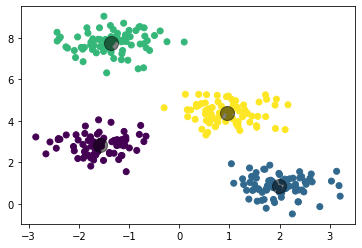

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); # plotting the centers onto scatter plot
                                                                        # c is for color, s is for dot size, and alpha is for transparency

# Silhoutte Coefficient and Sihoutte Plot

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for all samples. The Silhouette Coefficient for a sample is  
(
b
−
a
)
/
m
a
x
(
a
,
b
)
 . To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
This process produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.
From sklearn.metrics, we can call silhouette_score. This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

In [7]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


If you want to obtain the silhouette plot. The quickest way to do is through the Silhouette Visualizer, which displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for  
K
  by comparing multiple visualizers.
This requires yellowbrick package that is not pre-installed in Anaconda.
You will use this conda install -c districtdatalabs yellowbrick.
If you don't want to install yellowbrick, you can follow this tutorial to display the silhouette plot with sklearn by hand

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'yellowbrick'